<a href="https://colab.research.google.com/github/ByungtaeKim/python_codes/blob/main/pandas_%E1%84%8C%E1%85%A5%E1%86%BC%E1%84%85%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas 정리

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family="AppleGothic")
plt.rc('axes',unicode_minus=False)

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [ ]:
df = pd.read_csv('소상공인_의료기관_2019.csv',low_memory=False)

In [ ]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [ ]:
df.shape

(91335, 39)

In [ ]:
drop_columns=df.isnull().sum().sort_values(ascending=False).head(9).index.tolist()

In [ ]:
df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
df.shape

(91335, 30)

In [ ]:
df.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [ ]:
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

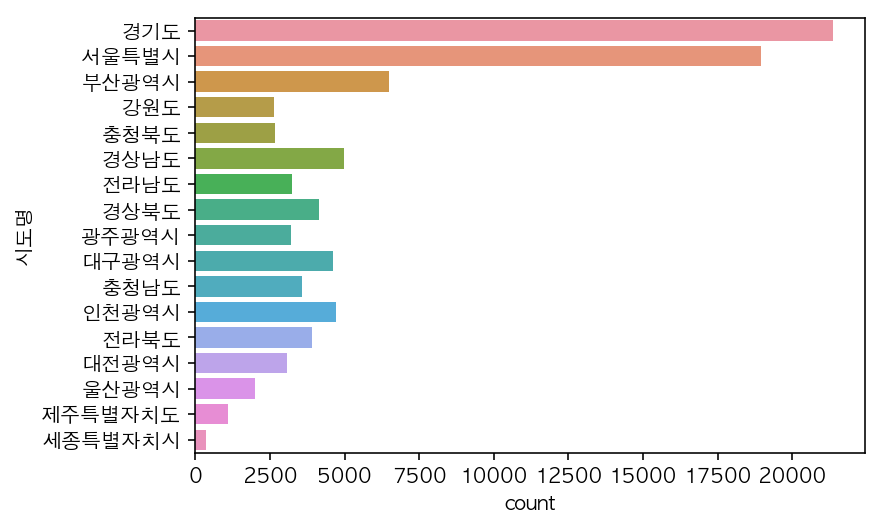

In [ ]:
c=sns.countplot(data=df,y='시도명')

In [ ]:
n=df['상권업종중분류명'].value_counts(normalize=True)

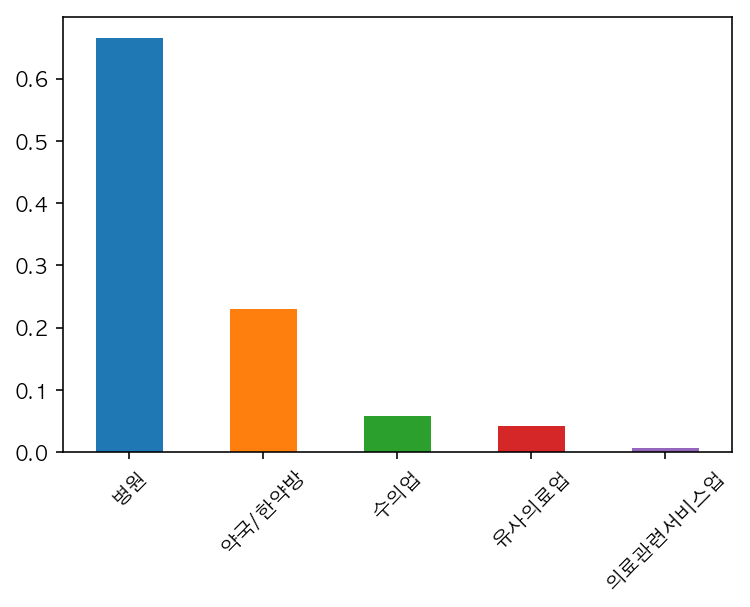

In [ ]:
n.plot.bar(rot=45)

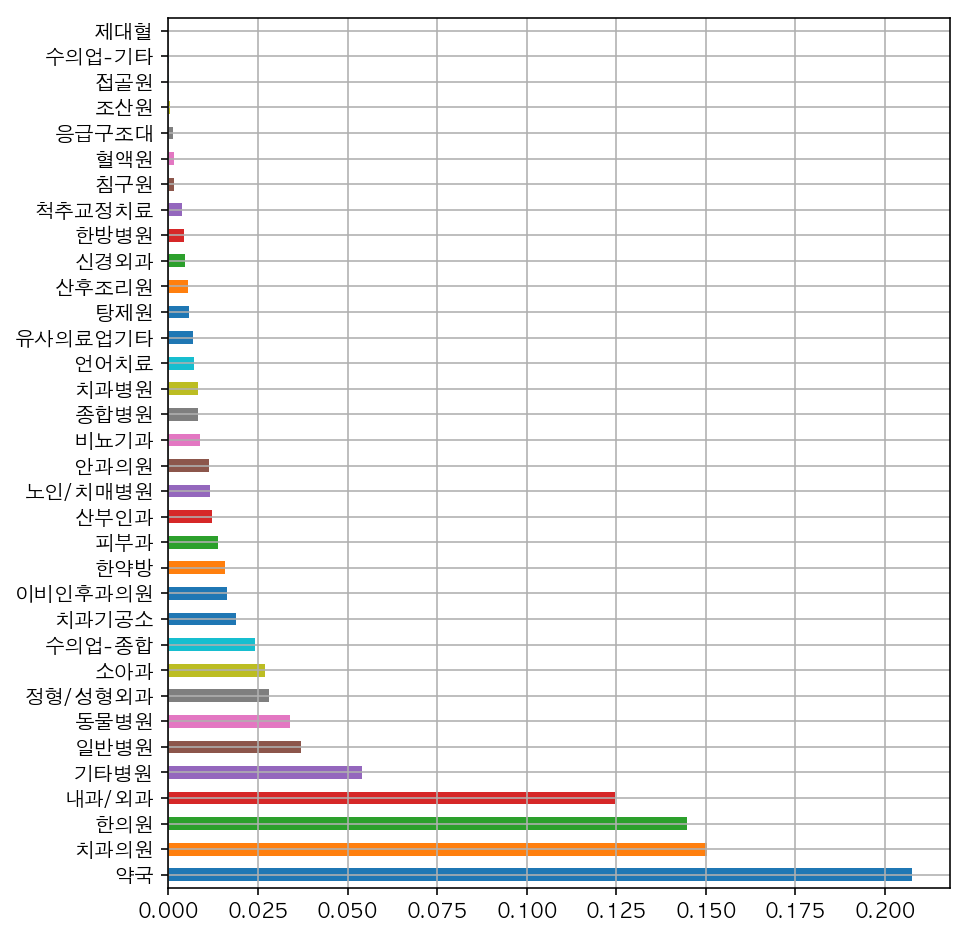

In [ ]:
s = df['상권업종소분류명'].value_counts(normalize=True)
s.plot.barh(figsize=(7,8), grid=True)

In [ ]:
df_medical= df[df['상권업종중분류명']=='약국/한약방'].copy()
df_medical.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,42.0,강원도,...,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,4211010500101000000023668,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,43.0,충청북도,...,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,4311112000101870017042942,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,48.0,경상남도,...,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,46.0,전라남도,...,전라남도 영암군 도포면 덕화리 296,468304685396,전라남도 영암군 도포면 인덕길,75,4683035023102960000000001,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080


In [ ]:
df_medical.shape

(20923, 30)

In [ ]:
df_seoul_drug = df[(df['상권업종소분류명']=='약국') & (df['시도명']=='서울특별시')]

In [ ]:
df_seoul_drug.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [ ]:
len(df_seoul_drug['시군구명'])

3579

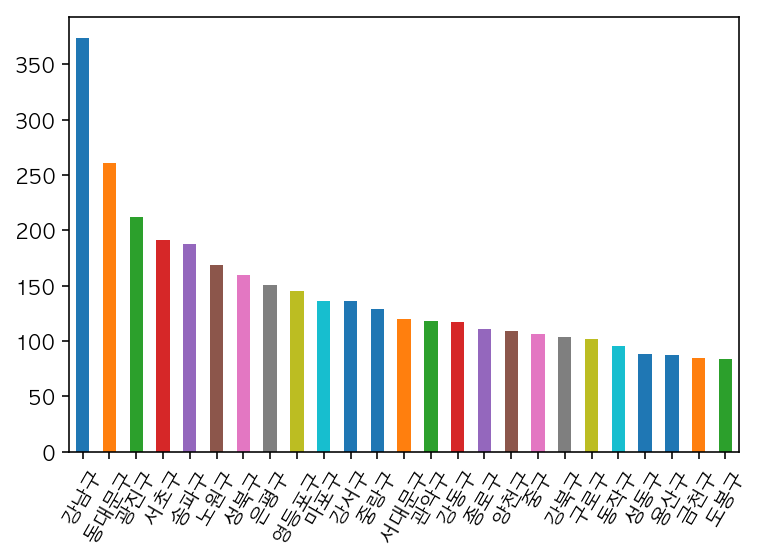

In [ ]:
n = df_seoul_drug['시군구명'].value_counts()
n.plot.bar(rot=60)

In [ ]:
df_seoul_hospital= df[(df['상권업종소분류명']=='종합병원') & (df['시도명']=='서울특별시')].copy()
df_seoul_hospital.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 양천구 신정동 897-13,114702005008,서울특별시 양천구 국회대로,250,1147010100108970013001044,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 강남구 역삼동 736-55,116804166727,서울특별시 강남구 테헤란로26길,10,1168010100107360055027688,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 성동구 행당동 15-1,112003103002,서울특별시 성동구 마조로,22,1120010700100150001019623,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469


In [ ]:
df_seoul_hospital['시군구명'].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
도봉구      4
양천구      4
서대문구     4
강북구      4
성북구      3
관악구      2
금천구      2
성동구      2
노원구      2
구로구      2
중랑구      2
강서구      2
동대문구     2
종로구      2
용산구      1
은평구      1
마포구      1
동작구      1
Name: 시군구명, dtype: int64

In [ ]:
df_medical=df[df['상권업종중분류명']=='약국/한약방'].copy()
df_medical.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,42.0,강원도,...,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,4211010500101000000023668,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,43.0,충청북도,...,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,4311112000101870017042942,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,48.0,경상남도,...,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,46.0,전라남도,...,전라남도 영암군 도포면 덕화리 296,468304685396,전라남도 영암군 도포면 인덕길,75,4683035023102960000000001,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080


In [ ]:
df_medical.shape
m=df['상권업종대분류명']=='의료'

In [ ]:
df.loc[m, '상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [ ]:
df_medi=df[df['상권업종중분류명']=='유사의료업']

In [ ]:
df['상호명'].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [ ]:
df_medi.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
22,21013731,세종언어치료센터,S,의료,S03,유사의료업,S03B07,언어치료,26.0,부산광역시,...,부산광역시 금정구 구서동 84-1,264102000010,부산광역시 금정구 중앙대로,1817,2641010700100840001017686,부산광역시 금정구 중앙대로 1817-11,609310.0,46273.0,129.091662,35.246528
40,20933900,고려수지침학회,S,의료,S03,유사의료업,S03B03,침구원,48.0,경상남도,...,경상남도 창원시 성산구 상남동 5-2,481234784088,경상남도 창원시 성산구 마디미로4번길,9,4812312700100050002026799,경상남도 창원시 성산구 마디미로4번길 9,642832.0,51495.0,128.684678,35.224113
97,21717820,청명원,S,의료,S03,유사의료업,S03B09,유사의료업기타,43.0,충청북도,...,충청북도 괴산군 청안면 금신리 241,437604538132,충청북도 괴산군 청안면 금신로1길,93,4376037022102410000007293,충청북도 괴산군 청안면 금신로1길 93,367831.0,28050.0,127.635740,36.768935
102,21865854,응급환자이송센터,S,의료,S03,유사의료업,S03B01,응급구조대,30.0,대전광역시,...,대전광역시 중구 대사동 248-237,301404295026,대전광역시 중구 계룡로921번길,40,3014011000102480237013097,대전광역시 중구 계룡로921번길 40,301846.0,34946.0,127.417693,36.321801
108,21914637,태화아동발달지원센터,S,의료,S03,유사의료업,S03B07,언어치료,30.0,대전광역시,...,대전광역시 중구 문화동 27,301404295402,대전광역시 중구 보문산로333번길,29,3014011600100270000008172,대전광역시 중구 보문산로333번길 29,301130.0,35020.0,127.412725,36.312953


In [ ]:
df_medi['상호명'].value_counts().head(10)

리원           32
고려수지침        22
대한적십자사       17
헌혈의집         12
수치과기공소       10
고려수지침학회      10
제일치과기공소       9
스마일치과기공소      8
대한응급환자이송단     8
아트치과기공소       8
Name: 상호명, dtype: int64

In [ ]:
df_seoul_drug= df[(df['상권업종소분류명']=='약국') & (df['시도명']=='서울특별시')]

In [ ]:
df_seoul_drug.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강동구 둔촌동 630,117403124002,서울특별시 강동구 명일로,172,1174010600106090000000001,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 중랑구 신내동 646,112603106007,서울특별시 중랑구 신내로,211,1126010600106460000000300,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 성동구 행당동 346,112003103006,서울특별시 성동구 행당로,82,1120010700103460012016935,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 동대문구 휘경동 286-121,112304115120,서울특별시 동대문구 망우로18나길,3,1123010900102860121007257,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349


In [ ]:
c = df_seoul_drug['시군구명'].value_counts()

In [ ]:
n = df_seoul_drug['시군구명'].value_counts(normalize=True)

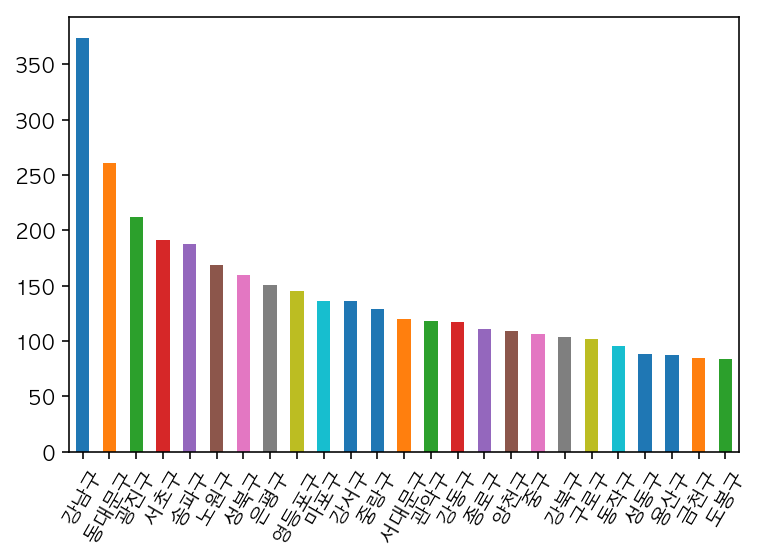

In [ ]:
c.plot.bar(rot=60)

In [ ]:
df_seoul_hospital= df[(df['상권업종소분류명']=='종합병원') & (df['시도명']=='서울특별시')].copy()

In [ ]:
df_seoul_hospital['시군구명'].value_counts().shape

(25,)

In [ ]:
remove_list = df_seoul_hospital.loc[~df_seoul_hospital['상호명'].str.contains('종합병원'), '상호명'].unique().tolist()

In [ ]:
remove_list

['대진의료재단',
 '홍익병원별관',
 'SNUH',
 '평화드림여의도성모병원의료기매장',
 '한양',
 '백산의료재단친구병원',
 '서울보훈병원',
 '서울성모병원장례식장꽃배달',
 '서울대학교병원',
 '알콜중독및정신질환상담소',
 '강남성모병원장례식장꽃배달',
 '제일병원',
 '이랜드클리닉',
 '사랑나눔의료재단',
 '우울증센터',
 '성심의료재단',
 '다나의료재단',
 '서울아산병원신관',
 '원자력병원장례식장',
 '국민의원',
 '고려대학교구로병원',
 '학교법인일송학원',
 '삼성의료원장례식장',
 '희명스포츠의학센터인공신장실',
 '연세대학교의과대학강남세브란스',
 '국립정신병원',
 '코아클리닉',
 '수서제일의원',
 '사랑의의원',
 '한국전력공사부속한일병원',
 '신촌연세병원',
 '창동제일의원',
 '영동세브란스병원',
 '제일성심의원',
 '삼성의료재단강북삼성태',
 '서울시립보라매병원',
 '서울이의원',
 '서울대학교병원비상계획외래',
 '평화드림서울성모병원의료',
 '홍익병원',
 '사랑나눔의료재단서',
 '독일의원',
 '서울연합의원',
 '우신향병원',
 '동부제일병원',
 '아산재단금강병원',
 '명곡안연구소',
 '아산재단서울중앙병원',
 '메디힐특수여객',
 '삼성생명공익재단삼성서',
 '성광의료재단차병원',
 '한국건강관리협회서울특',
 '정해복지부설한신메디피아',
 '성베드로병원',
 '성애의료재단',
 '실로암의원',
 'Y&T성모마취과',
 '광진성모의원',
 '서울현대의원',
 '이노신경과의원',
 '송정훼밀리의원',
 '서울중앙의원',
 '영남의료재단',
 '인제대학교서울백병원',
 '한국필의료재단',
 '세브란스의원',
 '가톨릭대학교성바오로병원장례식장',
 '서울연세의원',
 '사랑의병원',
 '성삼의료재단미즈메디병원',
 '씨엠충무병원',
 '성신의원',
 '원진재단부설녹색병원',
 '송파제일의원',
 '카톨릭성모의원',
 '한양성심의원',
 '관악성모의원',
 '강남센트럴병원',
 '우이한솔의원'

In [ ]:
drop_row=df_seoul_hospital[df_seoul_hospital['상호명'].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index

In [ ]:
drop_row = drop_row.tolist()

In [ ]:
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [ ]:
drop_row2 = df_seoul_hospital[df_seoul_hospital['상호명'].str.endswith('의원')].index.tolist()

In [ ]:
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [ ]:
drop_row +=drop_row2

In [ ]:
len(drop_row)

33

In [ ]:
df_seoul_hospital= df_seoul_hospital.drop(drop_row, axis=0)
df_seoul_hospital.shape

(58, 30)

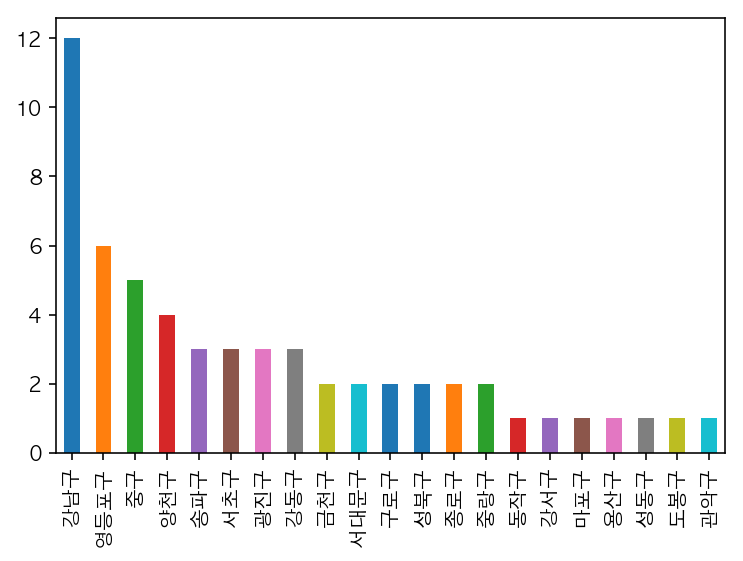

In [ ]:
df_seoul_hospital['시군구명'].value_counts().plot.bar()

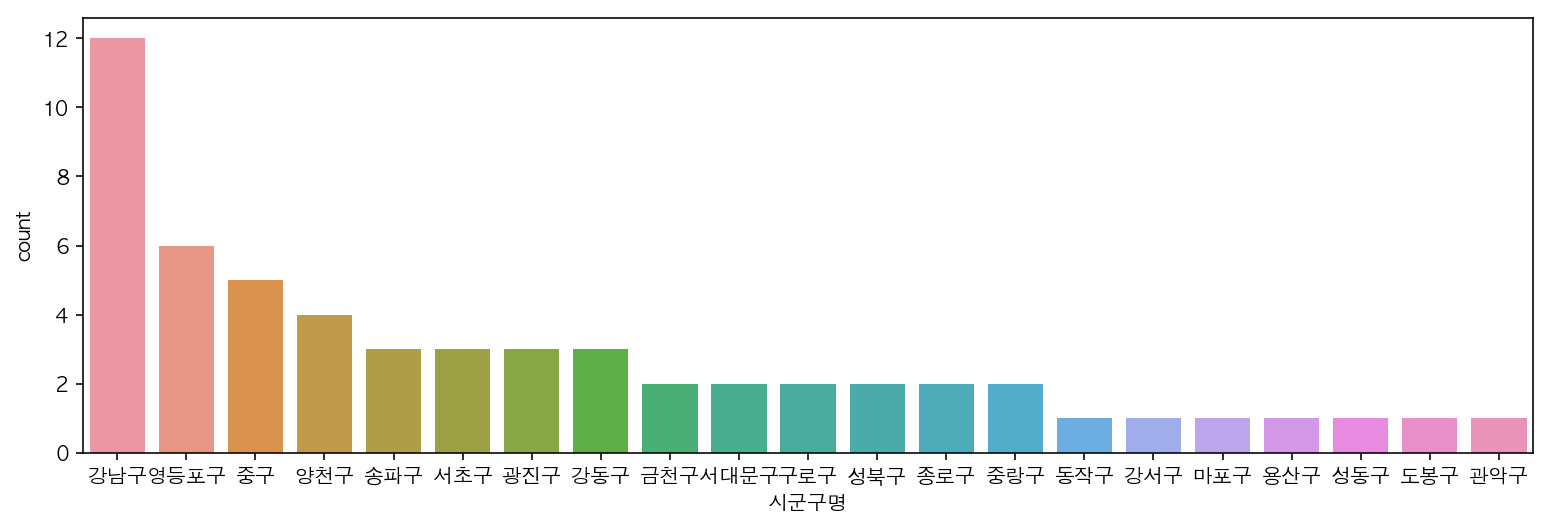

In [ ]:
plt.figure(figsize=(13,4))
sns.countplot(data=df_seoul_hospital, x = '시군구명', order= df_seoul_hospital['시군구명'].value_counts().index)

In [ ]:
df_seoul= df[df['시도명']=='서울특별시']
df_seoul.shape

(18943, 30)

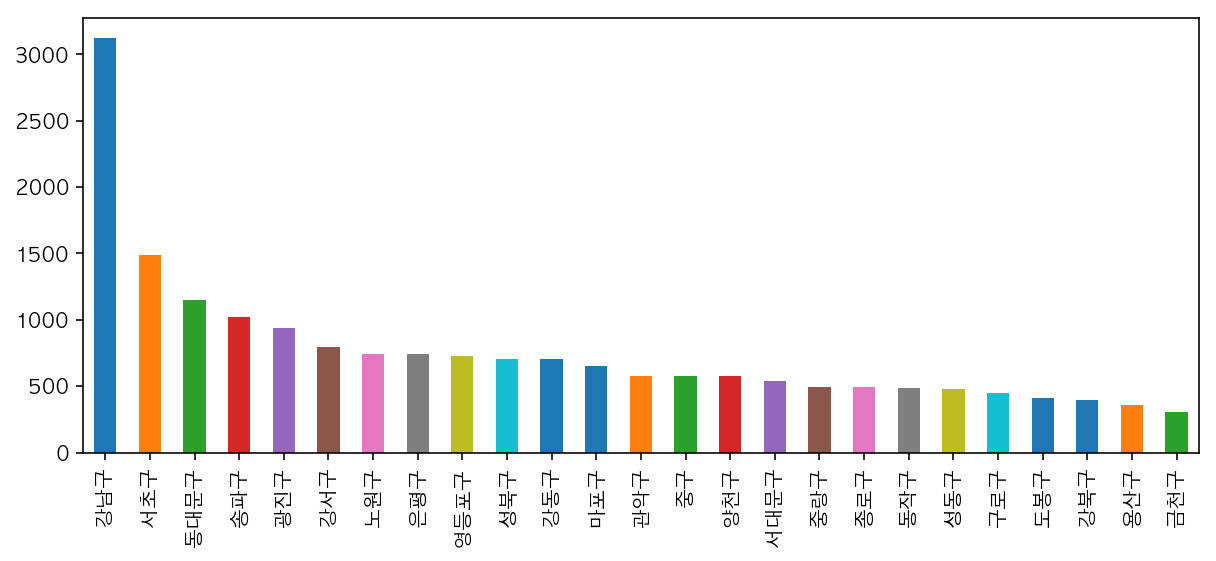

In [ ]:
df_seoul['시군구명'].value_counts().plot.bar(figsize=(10,4))

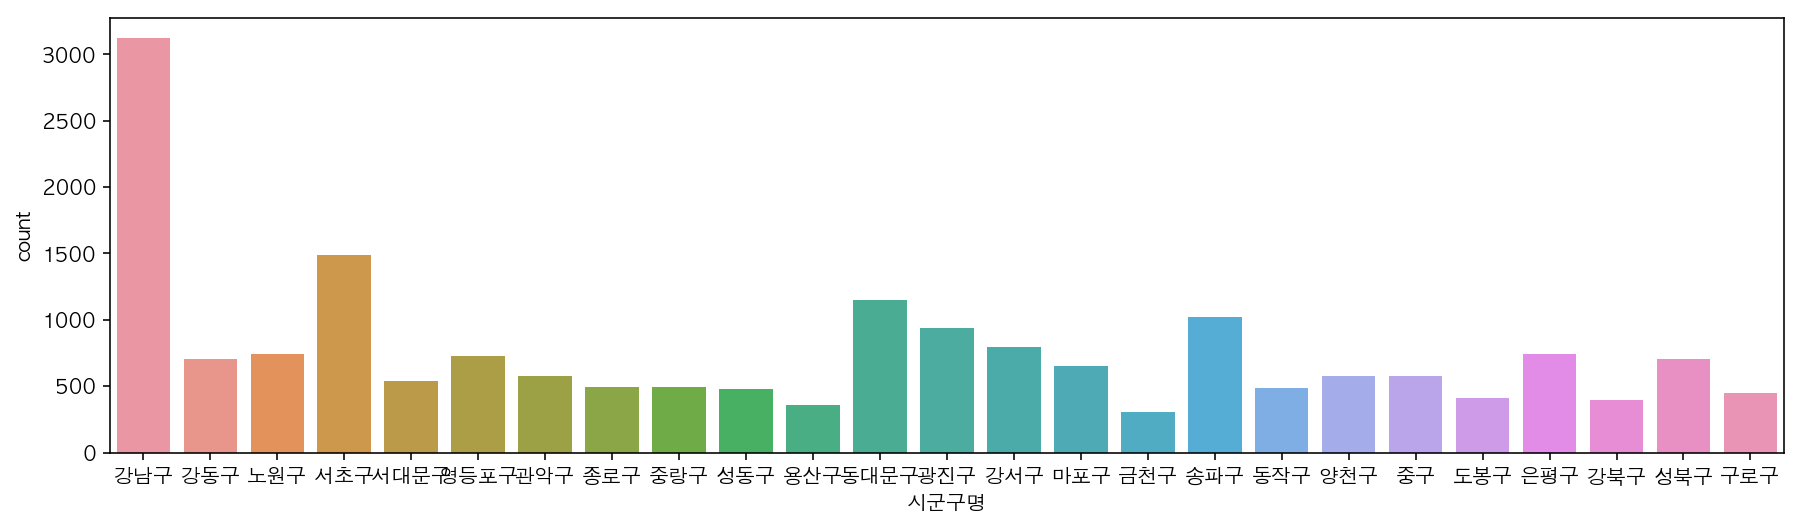

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul, x = '시군구명')

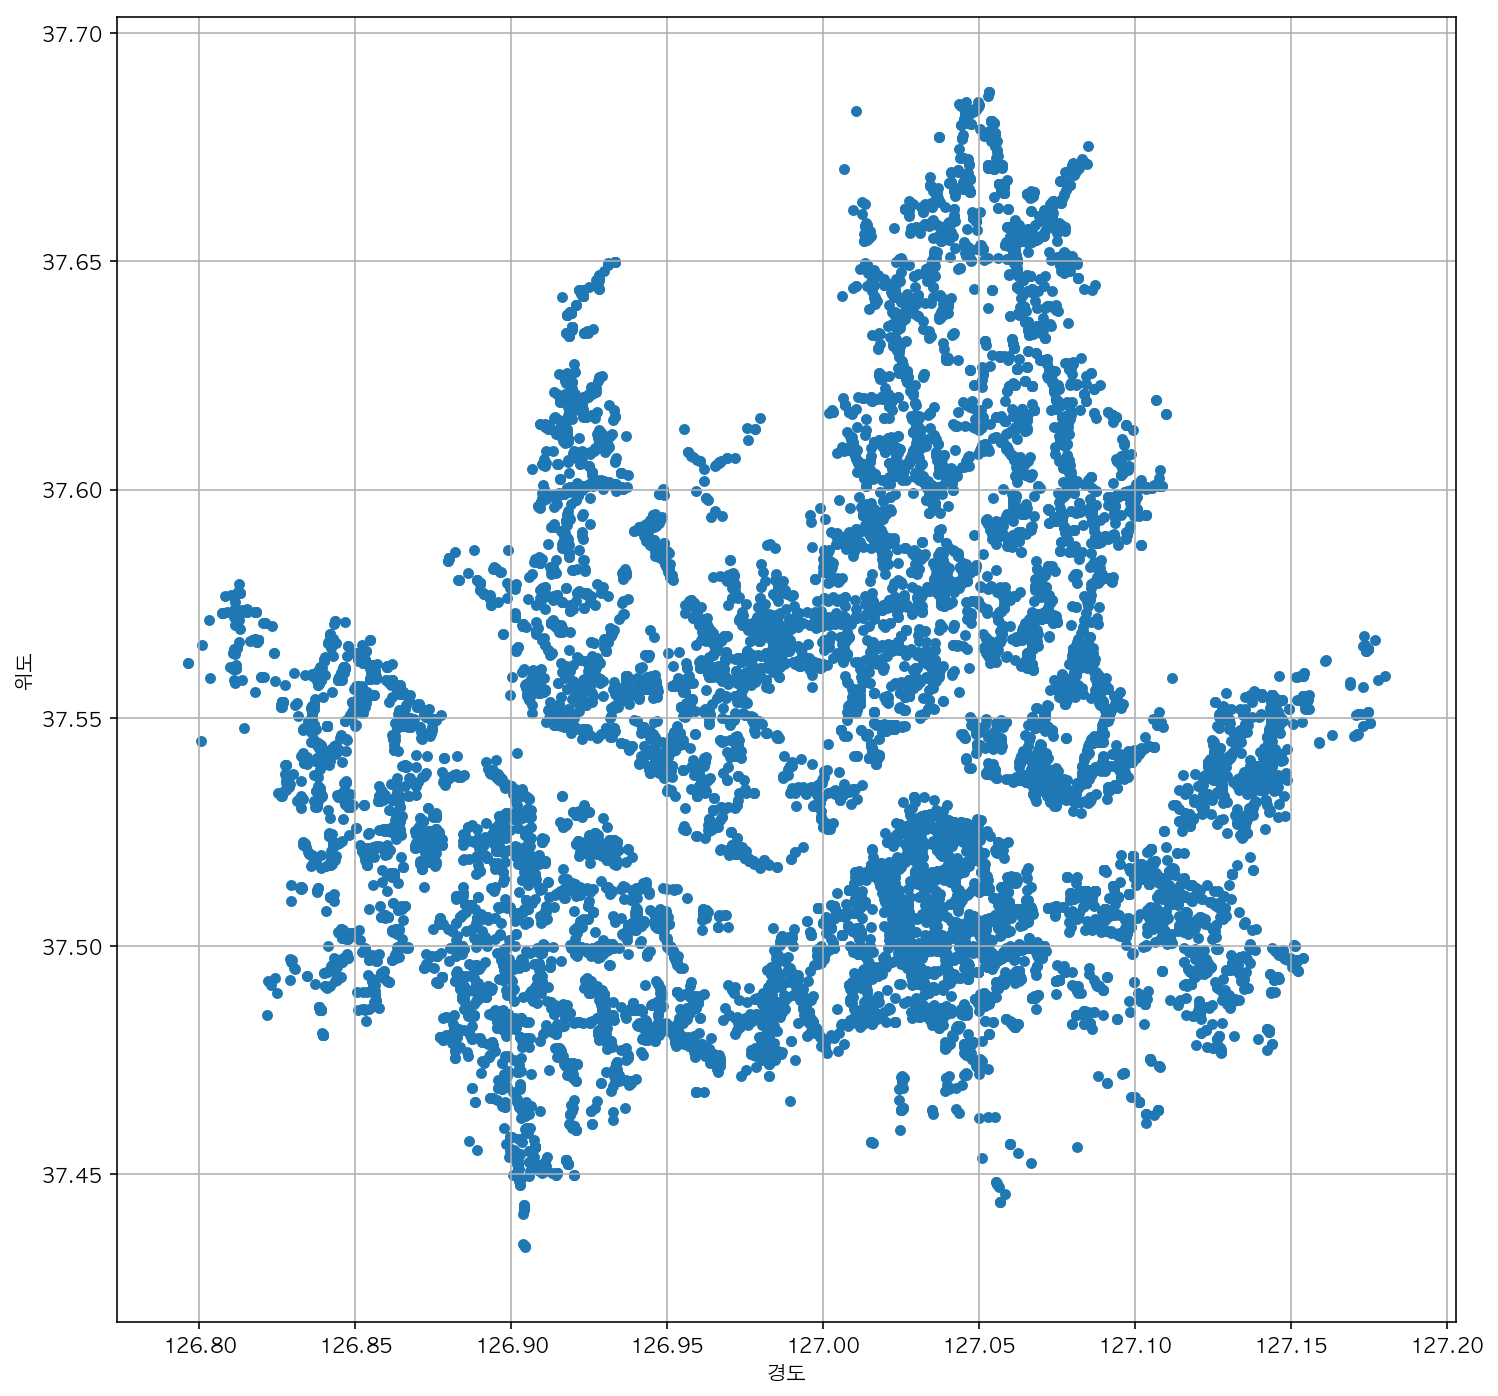

In [ ]:
df_seoul[['경도', '위도', '시군구명']].plot.scatter(x='경도', y='위도',figsize=(12,12), grid=True)

In [ ]:
import seaborn as sns

In [ ]:
sns.__version__

'0.11.1'

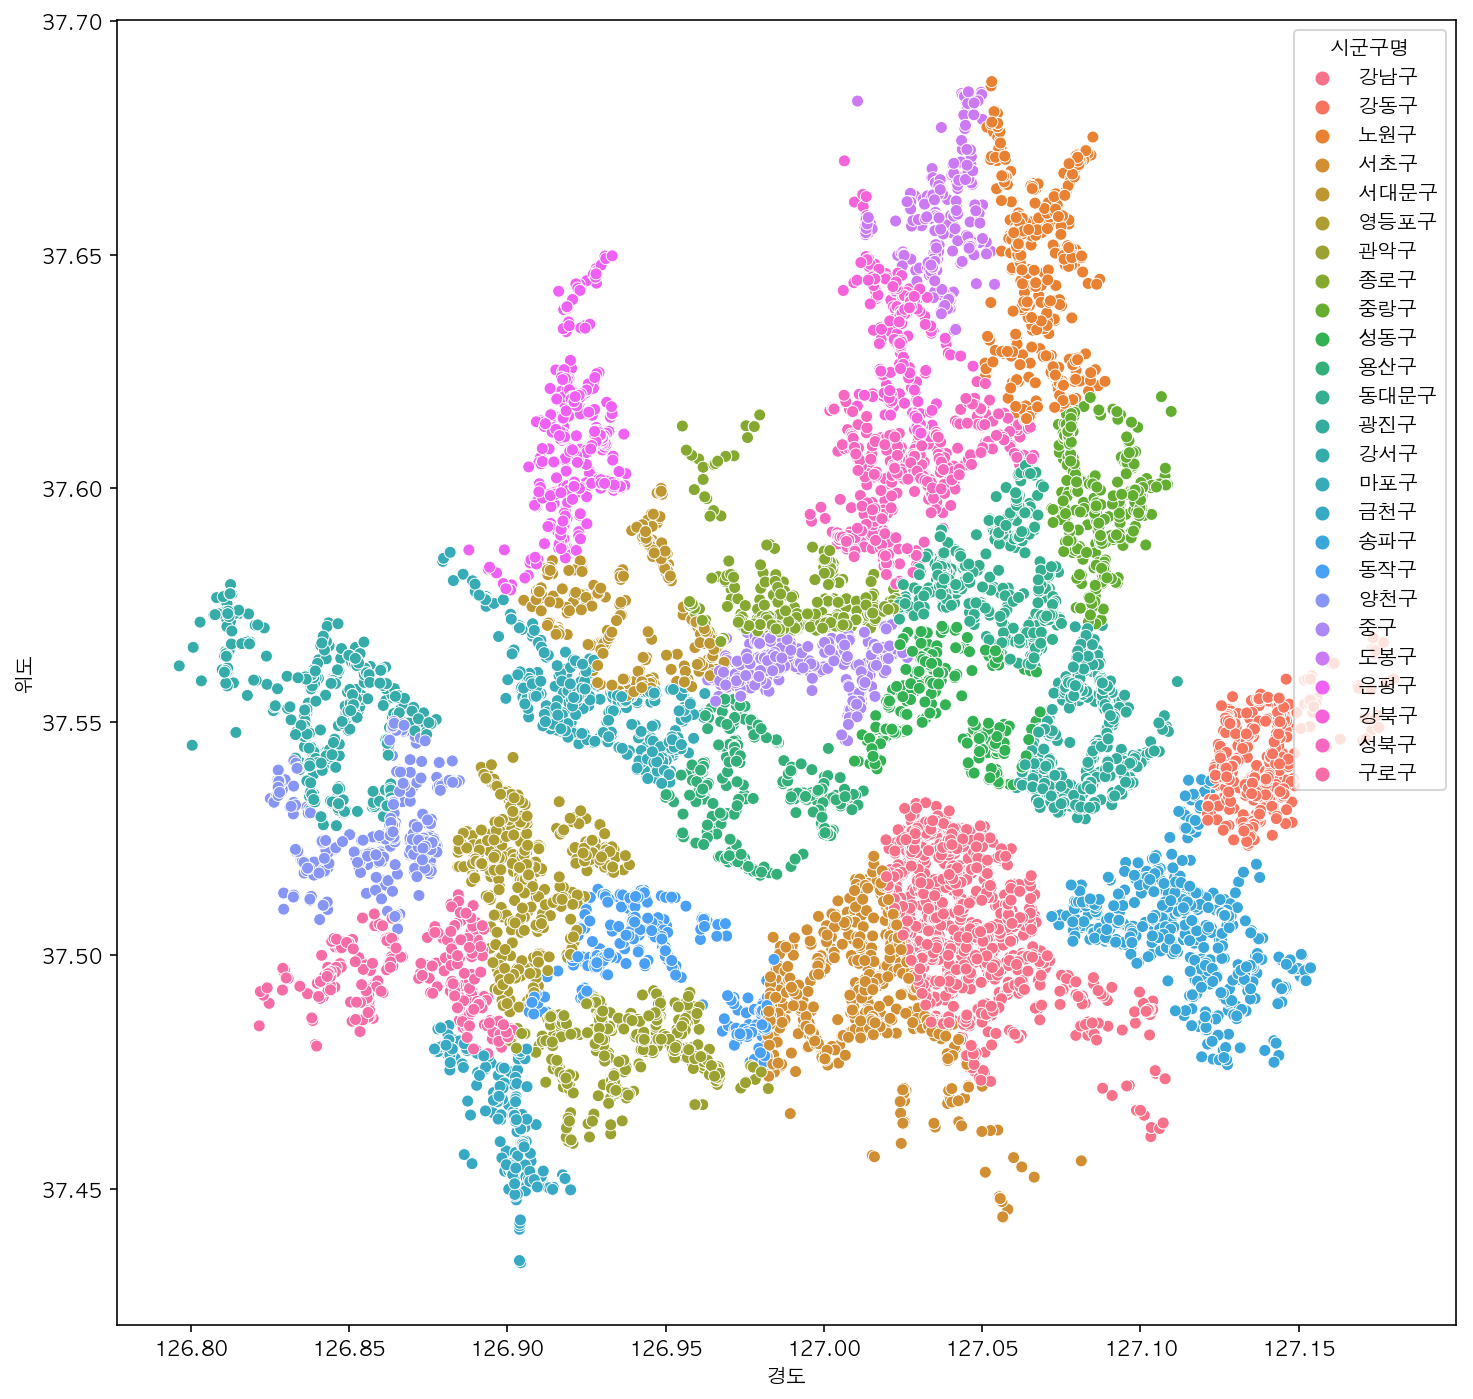

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df_seoul, x = "경도", y= "위도", hue ='시군구명')  #hue는 색상

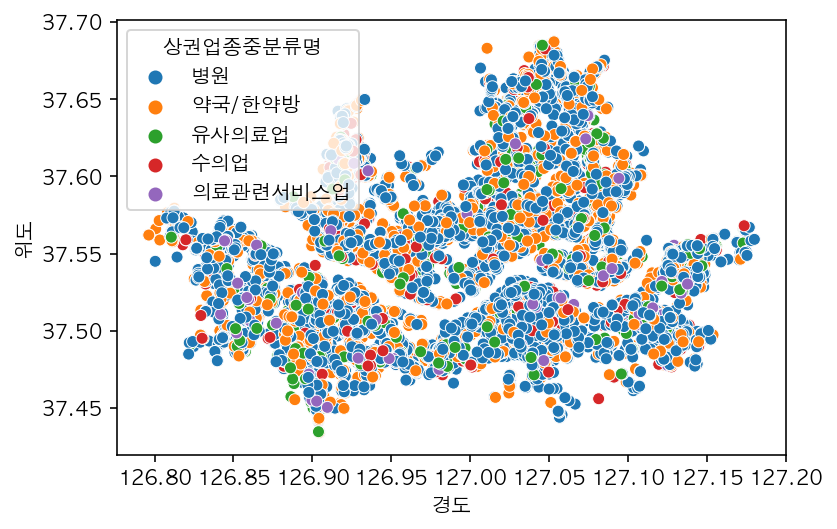

In [ ]:
sns.scatterplot(data=df_seoul, x = "경도", y= "위도", hue ='상권업종중분류명') 

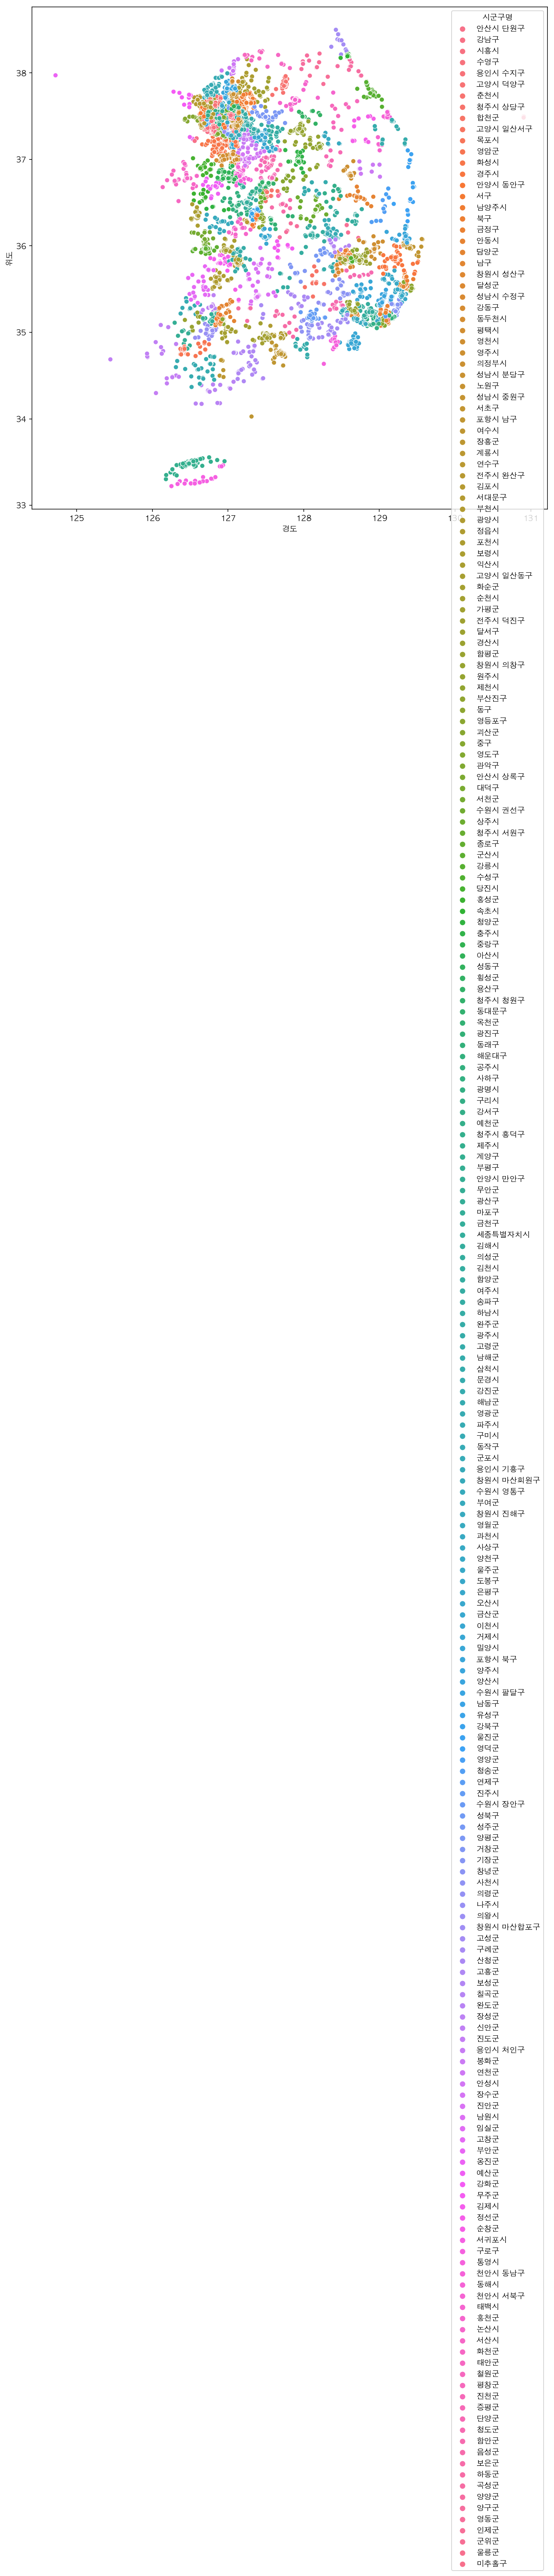

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(data=df, x = "경도", y= "위도", hue ='시군구명')  #hue는 색상

In [ ]:
import folium

In [ ]:
m = folium.Map(location=[37.589562, 127.016700])

In [ ]:
a=df_seoul_hospital['위도'].head(1)
b=df_seoul_hospital['경도'].head(1)
map=folium.Map(location=(a,b), zoomstart=8)
for i in df_seoul_hospital.index:
    name= df_seoul_hospital.loc[i, '상호명']
    address= df_seoul_hospital.loc[i, '도로명주소']
    popup= f"{name} : {address}"
    location= [df_seoul_hospital.loc[i, '위도'], df_seoul_hospital.loc[i, '경도']] 
    folium.Marker(location= location, popup=popup).add_to(map)
map